In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('restaurant_data.csv')
risks = {'None': 0, 'Moderate Risk': 2, 'Low Risk': 1, 'High Risk': 3}     ###changed 2 to 1 for 'low risk'
health_office = [37.778155, -122.418614]
df['miles_from_inspector'] = (((df.latitude - health_office[0])*69)**2 + ((df.longitude - health_office[1])*55)**2)**.5
df['risk_numeric'] = [risks[c] for c in df.risk_category]
df['time'] = [pd.to_datetime('{}/{}/{}'.format(r[1].day, r[1].month, r[1].year), format='%d/%m/%Y') for r in df.iterrows()]
df.head()

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19


In [41]:
'''
df['time_since'] = -1
for b in df.business_id.unique():
    dfb = df[df.business_id == b].sort_values('time', ascending =False)
    if len(dfb.time.unique()) > 1:
        last = max(dfb.time)
        prev = max([t for t in dfb.time if t < last])
        ind = dfb.index[0]
        since = last - prev
        df.loc[ind,'time_since'] = int(since.days)
'''

times = []
key_to_avg_time_between_mapping = {}     #maps time-business_id keys to the average time between all prior inspections
key_to_time_until = {}
for b in df.business_id.unique():
    dfb = df[df.business_id == b].sort_values('time', ascending = True)
    old_time = -1
    old_key = -1
    times_for_this_business = []
    for i, row in dfb.iterrows():
        time = row.time
        key = '{}{}'.format(row.business_id, row.time)
        if old_time == -1:
            key_to_avg_time_between_mapping[key] = None
        elif time != old_time:
            time_diff = np.abs(int((time - old_time).days))
            times.append(time_diff)
            times_for_this_business.append(time_diff)
            key_to_avg_time_between_mapping[key] = int(np.floor(np.mean(times_for_this_business)))
            key_to_time_until[old_key] = time_diff     
        old_time = time
        old_key = key

In [42]:
mean_time_diff = int(np.floor(np.mean(times)))
for i in key_to_avg_time_between_mapping:
    if key_to_avg_time_between_mapping[i] == None:
        key_to_avg_time_between_mapping[i] = mean_time_diff
        
mean_time_diff

388

In [44]:
#df = df.replace(-1,df[(df.time_since != -1) & (df.year != 2019)].time_since.mean())

df['time_since'] = df.apply(lambda row: key_to_avg_time_between_mapping['{}{}'.format(row.business_id, row.time)], axis = 1)
df['time_until'] = df.apply(lambda row: key_to_time_until.get('{}{}'.format(row.business_id, row.time), -1), axis = 1)

In [45]:
df.head(50)

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time,time_since,time_until
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26,388,-1
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05,388,598
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05,388,598
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26,598,-1
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19,388,198
5,4,5,2018,10280,Low Risk,88,94102,37.782034,-122.419777,0.275188,1,2018-04-05,198,196
6,10,18,2018,10280,High Risk,81,94102,37.782034,-122.419777,0.275188,3,2018-10-18,197,134
7,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,197,134
8,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,197,134
9,10,18,2018,10280,Low Risk,81,94102,37.782034,-122.419777,0.275188,1,2018-10-18,197,134


In [46]:
X = df[df.year != 2019]
X = df[['time', 'business_id', 'risk_numeric', 'inspection_score', 'miles_from_inspector', 'time_since', 'time_until']]
max_times = {}
for i, row in X.iterrows():
    if row.business_id in max_times:
        max_times[row.business_id] = max([max_times[row.business_id], row.time])
    else:
        max_times[row.business_id] = row.time
X = X[X.time < X.apply(lambda row:max_times[row.business_id], axis=1)]

In [47]:
X.head()

,time,business_id,risk_numeric,inspection_score,miles_from_inspector,time_since,time_until
1,2017-09-05,10083,2,81,1.451159,388,598
2,2017-09-05,10083,2,81,1.451159,388,598
4,2017-09-19,10280,2,92,0.275188,388,198
5,2018-04-05,10280,1,88,0.275188,198,196
6,2018-10-18,10280,3,81,0.275188,197,134


In [48]:
max_risk = {}
counts = {}
for i, row in X.iterrows():
    key = '{}{}'.format(row.business_id, row.time)
    counts[key] = counts.get(key, 0) + 1
    if key in max_risk:
        max_risk[key] = max([max_risk[key], row.risk_numeric])
    else:
        max_risk[key] = row.risk_numeric

In [49]:
mask = []
seen = set()
for i, row in X.iterrows():
    key = '{}{}'.format(row.business_id, row.time)
    if key not in seen:
        mask.append(True)
        seen.add(key)
    else:
        mask.append(False)

In [50]:
X = X[mask]

for i, row in X.iterrows():
    key = '{}{}'.format(row.business_id, row.time)
    row.risk_numeric = max_risk[key]
    
X['violation_total'] = X.apply(lambda row: counts['{}{}'.format(row.business_id, row.time)], axis = 1)

In [52]:
X

,time,business_id,risk_numeric,inspection_score,miles_from_inspector,time_since,time_until,violation_total
1,2017-09-05,10083,2,81,1.451159,388,598,2
4,2017-09-19,10280,2,92,0.275188,388,198,1
5,2018-04-05,10280,1,88,0.275188,198,196,1
6,2018-10-18,10280,3,81,0.275188,197,134,4
12,2017-05-23,10282,3,91,1.676005,388,385,1
15,2017-10-02,10332,2,79,0.400260,388,421,3
18,2018-11-27,10332,1,75,0.400260,421,231,3
23,2017-07-28,10433,1,86,0.844765,388,545,1
30,2017-06-05,10540,1,72,1.803992,388,375,6
36,2018-06-15,10540,3,87,1.803992,375,279,1


In [52]:
df

,month,day,year,business_id,risk_category,inspection_score,zipcode,latitude,longitude,miles_from_inspector,risk_numeric,time
0,2,26,2018,10030,None,100,94103,37.766864,-122.419014,0.779390,0,2018-02-26
1,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
2,9,5,2017,10083,Moderate Risk,81,94111,37.794024,-122.401299,1.451159,2,2017-09-05
3,4,26,2019,10083,Moderate Risk,86,94111,37.794024,-122.401299,1.451159,2,2019-04-26
4,9,19,2017,10280,Moderate Risk,92,94102,37.782034,-122.419777,0.275188,2,2017-09-19
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,5,29,2019,93363,Moderate Risk,96,94133,37.797948,-122.406393,1.522161,2,2019-05-29
3231,8,1,2019,96592,Moderate Risk,86,94109,37.806153,-122.420474,1.934569,2,2019-08-01
3232,6,27,2019,98013,Moderate Risk,88,94105,37.792308,-122.393809,1.677769,2,2019-06-27
3233,7,2,2019,99049,Moderate Risk,84,94121,37.775728,-122.497522,4.343170,2,2019-07-02


(array([505., 167., 198.,  61.,  64.,   7.,  13.,   3.,   1.,   1.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

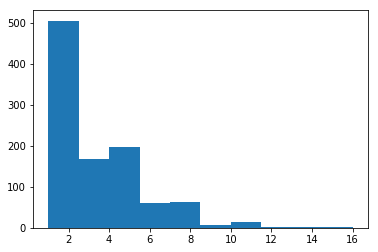

In [15]:
plt.hist(df.groupby('business_id').size())

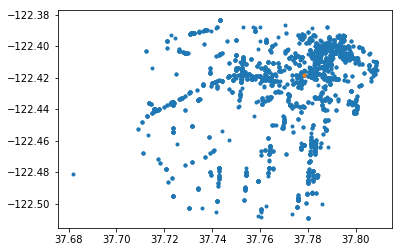

In [21]:
plt.plot(df.latitude, df.longitude, '.')
plt.plot([37.778155], [-122.418614], '.')

In [ ]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X.T)), X.T), y)